In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
music_file1 = pd.read_csv("data_music.csv",  encoding = "ISO-8859-1")
#music_file2 =  pd.read_csv("data_music.csv",  encoding = "ISO-8859-1")
music_file2 = pd.read_csv("data_music2.csv", encoding= "ISO-8859-1")
music_total = pd.concat([music_file1,music_file2], ignore_index=True)

In [3]:
music_total = music_total.drop('filename',1)
music_total = music_total.fillna(music_total.mean())

In [4]:
xData = music_total.iloc[:,:28]
yData = music_total['label']



#xData 정규화
std_scaler = StandardScaler()
std_scaler.fit(xData)
xData1 = std_scaler.transform(xData)
xData1 = pd.DataFrame(xData1, columns=xData.columns, index=list(xData.index.values))

In [5]:
yData = pd.get_dummies(yData) 
x_train,x_test,y_train,y_test = train_test_split(xData1,yData,random_state=0)

In [6]:
model = Sequential()
#model.add(Dense(64, input_dim=28, activation='relu'))
model.add(Dense(16, input_dim=28, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax')) 
#[ ~,~ , ~,~] 확률로 output이 제공되는데, sofrmax를 사용하면, 모든 값의 합이 1이어야한다.
#높을 수록 해당 분류에 속할 가능성이 높다.
#sigmoid는 값으로 제공된다. 
#relu는 o,x값으로 분류한다.(sigmoid를 적용할 경우, layer수를 늘리게 되면, gradient 방향으로 진행됐을때, 값이 0에 가까워져 예측이 명확하지 않음.)

 

In [7]:
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
900/900 [==============================] - 0s 173us/step - loss: 2.4423 - accuracy: 0.0733
Epoch 2/100
900/900 [==============================] - 0s 25us/step - loss: 2.3437 - accuracy: 0.0833
Epoch 3/100
900/900 [==============================] - 0s 27us/step - loss: 2.2699 - accuracy: 0.1689
Epoch 4/100
900/900 [==============================] - 0s 31us/step - loss: 2.2083 - accuracy: 0.2200
Epoch 5/100
900/900 [==============================] - 0s 31us/step - loss: 2.1564 - accuracy: 0.2767
Epoch 6/100
900/900 [==============================] - 0s 24us/step - loss: 2.1093 - accuracy: 0.3422
Epoch 7/100
900/900 [==============================] - 0s 25us/step - loss: 2.0668 - accuracy: 0.3367
Epoch 8/100
900/900 [==============================] - 0s 24us/step - loss: 2.0267 - accuracy: 0.3411
Epoch 9/100
900/900 [==============================] - 0s 25us/step - loss: 1.9887 - accuracy: 0.3456
Epoch 10/100
900/900 [==============================] - 0s 29us/step - loss: 1.95

900/900 [==============================] - 0s 23us/step - loss: 1.1114 - accuracy: 0.6244
Epoch 81/100
900/900 [==============================] - 0s 32us/step - loss: 1.1060 - accuracy: 0.6289
Epoch 82/100
900/900 [==============================] - 0s 26us/step - loss: 1.1027 - accuracy: 0.6200
Epoch 83/100
900/900 [==============================] - 0s 24us/step - loss: 1.0999 - accuracy: 0.6278
Epoch 84/100
900/900 [==============================] - 0s 19us/step - loss: 1.0943 - accuracy: 0.6311
Epoch 85/100
900/900 [==============================] - 0s 21us/step - loss: 1.0897 - accuracy: 0.6333
Epoch 86/100
900/900 [==============================] - 0s 22us/step - loss: 1.0857 - accuracy: 0.6322
Epoch 87/100
900/900 [==============================] - 0s 18us/step - loss: 1.0813 - accuracy: 0.6344
Epoch 88/100
900/900 [==============================] - 0s 24us/step - loss: 1.0781 - accuracy: 0.6333
Epoch 89/100
900/900 [==============================] - 0s 19us/step - loss: 1.0737 - 

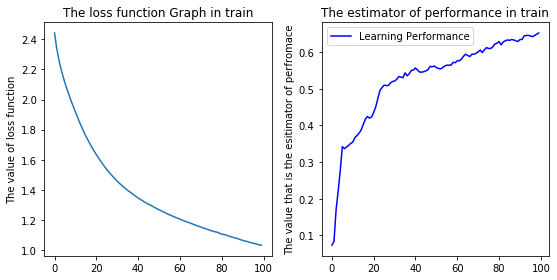

In [9]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("The loss function Graph in train")
plt.ylabel("The value of loss function")
plt.subplot(1, 2, 2)
plt.title("The estimator of performance in train")
plt.ylabel("The value that is the esitimator of perfromace")
plt.plot(hist.history['accuracy'], 'b-', label="Learning Performance")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
#https://datascienceschool.net/view-notebook/51e147088d474fe1bf32e394394eaea7/
#모델 사용

In [11]:
yhat = model.predict(x_test)

In [12]:
yhat[3:4]

array([[0.04266368, 0.00838279, 0.35538685, 0.11754276, 0.05834606,
        0.07904664, 0.00872631, 0.09737969, 0.18778063, 0.0447446 ]],
      dtype=float32)

In [13]:
y_train[3:4]

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
2,1,0,0,0,0,0,0,0,0,0


In [14]:
yhat[3:4]
result = yhat[3:4]

In [15]:
labelList = yData.columns
length = len(labelList)
index_label = 0 
for i in labelList:
    if index_label == np.argmax(result):
        print("다음 장르는 :",i,)
    index_label += 1
 #값이 가장 큰 값 -> 분류에서 1에 가까울 수록, 라벨링, yhat[5:6].max()

다음 장르는 : country
